<a href="https://colab.research.google.com/github/christiantommasi/MeuPortf-lioEmPythonER/blob/main/Energia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Objetivos com o projeto de consumo de Energia

1. Após conclusão do projeto, vou criar duas variáveis que armazenam os valores de data e previsão (que se refere à previsão de consumo de energia) para armazenar os dados e plotar visualmente para comparação.

2. Com esse projeto, pretendo adiquir futuros dados de consumo de energia, levando assim, à um cálculo de quanto será consumido em Wh por um período X de dias, semanas ou meses, podendo se preparar e planejar qual seria o consumo em energia e o gasto que isso traria ao bolso.

3. É um projeto didático, fictício que extrai do kaggle, para aprendizado e aperfeiçoamento das habilidades, futuramente, pretendo ingressar em projetos reais nas competições que encontrei no site.

4. Em breve, após conclusão de mais 3 ou 4 projetos como esse de estudo, pretendo introduzir projetos reais que realmente agregam valor ao mundo real, como predição de preços de imóveis, vendas em ecommerce, projetos de investimentos, etc.

Importação das bilbiotecas necessárias

In [ ]:
if(!require(area)) install.packages("repr")
library(repr)
if(!require(area)) install.packages("MASS")
library(MASS)
if(!require(area)) install.packages("nortest")
library(nortest)

In [3]:
#Definindo o tamanho do gráfico para exibição de 15x6
options(repr.plot.width=20, repr.plot.height=10)

Importação do arquivo csv

In [ ]:
dados = read.csv("energy.csv", header=T, stringsAsFactors=T, na.strings=T)

Renomeando as colunas para melhor interpretação
#Explicação dos nomes das colunas:
1. Data: Dias e horários que os dados foram coletados
2. Usada: Energia usada em Wh
3. Luzes: Energia usada nos cômodos da casa em Wh
4. TempCoz: Temperatura da cozinha
5. UmiCoz: Umidade da cozinha
6. TempSala: Temperatura da sala
7. UmiSala: Umidade da Sala
8. TempLava: Temperatura da lavanderia
9. UmiLava: Umidade da lavanderia
10. TempEsc: Temperatura do escritório
11. UmiEsc: Umidade do escritório
12. TempBan: Temperatura do banheiro
13. UmiBan: Umidade do banheiro
14. TempImoLN: Temperatura externa do imóvel lado norte
15. UmiImoLN: Umidade externa do imóvel lado norte
16. TempPasRou: Temperatura do ambiente de passar roupa
17. UmiPasRou: Umidade do ambiente de passar roupa
18. TempQua1: Temperatura quarto 1
19. UmiQua2: Umidade quarto 1
20. TempQua2: Temperatura quarto 2
21. UmiQua2: Umidade quarto 2
22. TempExt: Temperatura externa
23. Pressao: Pressão atmosférica
24. UmiExt: Umidade externa
25. VenVelo: Vento velocidade
26. Visibilidade: Visibilidade (da estação meteorológica de Chièvres)
27. PontoOrvalho: Ponto de Orvalho
28. Aleatoria 1
29. Aleatoria 2

In [83]:
colnames(dados) = c("Data","Usada","Luzes","TempCoz","UmiCoz","TempSala","UmiSala","TempLava","UmiLava",
                    "TempEsc","UmiEsc","TempBan","UmiBan","TempImoLN","UmiImoLN","TempPasRou","UmiPasRou",
                    "TempQua1","UmiQua1","TempQua2","UmiQua2","TempExt","Pressao","UmiExt","VenVelo","Visibilidade",
                    "PontoOrvalho","Aleatoria1","Aleatoria2")
head(dados, 2)

,Data,Usada,Luzes,TempCoz,UmiCoz,TempSala,UmiSala,TempLava,UmiLava,TempEsc,⋯,TempQua2,UmiQua2,TempExt,Pressao,UmiExt,VenVelo,Visibilidade,PontoOrvalho,Aleatoria1,Aleatoria2
,<fct>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2016-01-11 17:00:00,60,30,19.89,47.59667,19.2,44.7900,19.79,44.73,19,⋯,17.03333,45.53,6.600000,733.5,92,7.000000,63.00000,5.3,13.27543,13.27543
2,2016-01-11 17:10:00,60,30,19.89,46.69333,19.2,44.7225,19.79,44.79,19,⋯,17.06667,45.56,6.483333,733.6,92,6.666667,59.16667,5.2,18.60619,18.60619


Verificando presença de valores NAs

In [ ]:
#Verificando qualquer NAs
anyNA(dados)

#Contando os valores presentes de NAs
colSums(is.na(dados))

#Só para confirmar se existem algum valor NAs
dados[!complete.cases(dados), ]

Fazendo o tratamento das colunas para análise dos dados, foram encontrados alguns valores inconsistentes para o modelo de machine learning

Verificando a presença de valores 0 (zero) no data frame

In [97]:
#Colunas com zero (0)
colunascomzero = sapply(dados, function(col) any(col == 0))

#Retornando o nome das colunas com valores 0 (zero)
colunazero = names(colunascomzero[colunascomzero])

colunazero

[1] "TempImoLN"    "TempExt"      "VenVelo"      "PontoOrvalho"

#Tratando a coluna Luzes

In [ ]:
#summary(dados$Luzes)

#Criando a variável que armazena o valor da mediana luzes diferentes de zero
mediana_luzes = median(dados$Luzes[dados$Luzes != 0])
#Retornou o valor de 20

#Substituindo os valores de 0 pelo cálculo da mediana dos dados
dados$Luzes[dados$Luzes == 0] = mediana_luzes

summary(dados$Luzes)

#Tratando a coluna TempImoLN

In [ ]:
#summary(dados$TempImoLN)

#Criando a variável que armazena o valor da mediana TempImoLN diferentes de zero
mediana_TempImoLN = median(dados$TempImoLN[dados$TempImoLN != 0])
#Retornou o valor de 7.3

#Substintuindo os valores de 0 pelo cálculo da mediana dos dados
dados$TempImoLN[dados$TempImoLN == 0] = mediana_TempImoLN

summary(dados$TempImoLN)

#Tratando a coluna TempExt

In [ ]:
#summary(dados$TempExt)

#Criando a variável que armazena o valor da mediana TempExt diferente de zero
mediana_TempExt = median(dados$TempExt[dados$TempExt != 0])
#Retornou o valor de 6.93333333333333

#Substituindo os valores de 0 pelo cálculo da mediana dos dados
dados$TempExt[dados$TempExt == 0] = mediana_TempExt

summary(dados$TempExt)

#Tratando a coluna VenVelo

In [ ]:
#summary(dados$VenVelo)

#Calculando a mediana da coluna VenVelo diferente de zero
mediana_VenVelo = median(dados$VenVelo[dados$VenVelo != 0])
#Retornou o valor de 3.66666666666667

#Substituindo os valores de 0 pelo cálculo da mediana dos dados
dados$VenVelo[dados$VenVelo >= 0 & dados$VenVelo <= 0.99] = mediana_VenVelo

summary(dados$VenVelo)

#Tratando a coluna PontoOrvalho

In [ ]:
#summary(dados$PontoOrvalho)

#Calculando a mediana da coluna PontoOrvalho diferente de zero
mediana_PontoOrvalho = median(dados$PontoOrvalho[dados$PontoOrvalho != 0])
#Retornou o valor de 3.48333333333333

#Substituindo os valores de 0 pelo cálculo da mediana dos dados
dados$PontoOrvalho[dados$PontoOrvalho >= 0 & dados$PontoOrvalho <= 0.99] = mediana_PontoOrvalho

summary(dados$PontoOrvalho)

#Última verificação para saber se ainda existem valores 0 (zero) no data frame

In [ ]:
#Colunas com zero (0)
colunascomzero = sapply(dados, function(col) any(col == 0))

#Retornando o nome das colunas com valores 0 (zero)
colunazero = names(colunascomzero[colunascomzero])

colunazero

"Devidamente substituidos e tratados!"

Verificando valores outliers na coluna usada

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  10.00   50.00   60.00   97.69  100.00 1080.00 

Warning message:
“In density.default(dados$Usada, col = "red", lwd = 2) :
 extra arguments ‘col’, ‘lwd’ will be disregarded”


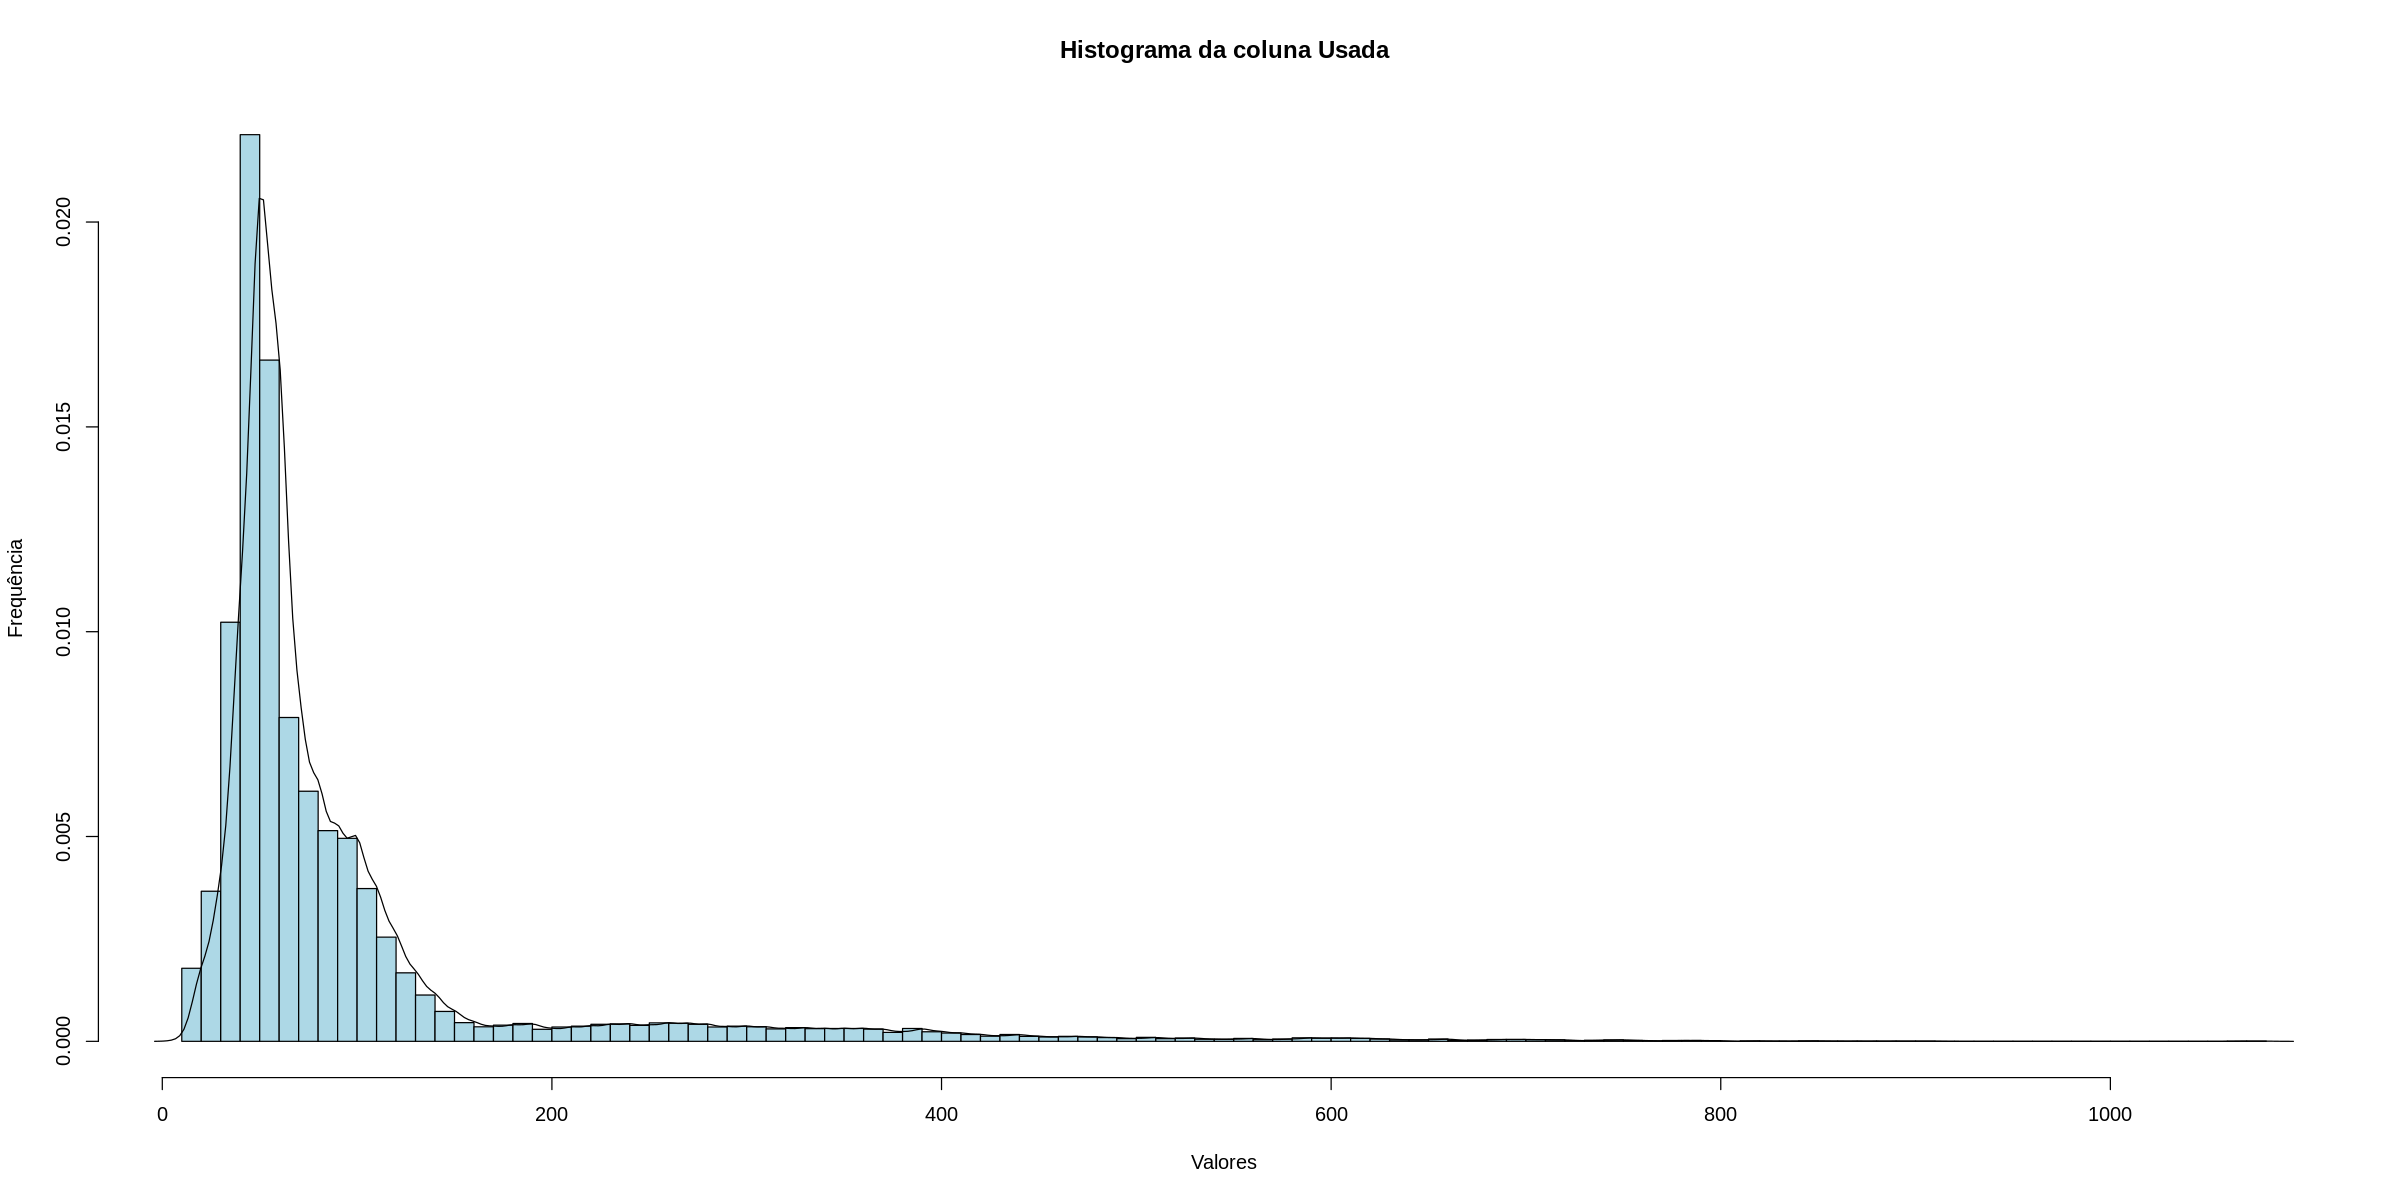

In [7]:
summary(dados$Usada)

hist(dados$Usada, main="Histograma da coluna Usada", xlab="Valores", ylab="Frequência", col="lightblue", breaks=100, probability=T)
lines(density(dados$Usada, col="red", lwd=2))

Criando variáveis de quartis para remoção de valores de Outliers

Warning message in ks.test.default(usada_normalizada, "pnorm", mean(usada_normalizada), :
“ties should not be present for the one-sample Kolmogorov-Smirnov test”



	Asymptotic one-sample Kolmogorov-Smirnov test

data:  usada_normalizada
D = 0.16955, p-value < 2.2e-16
alternative hypothesis: two-sided


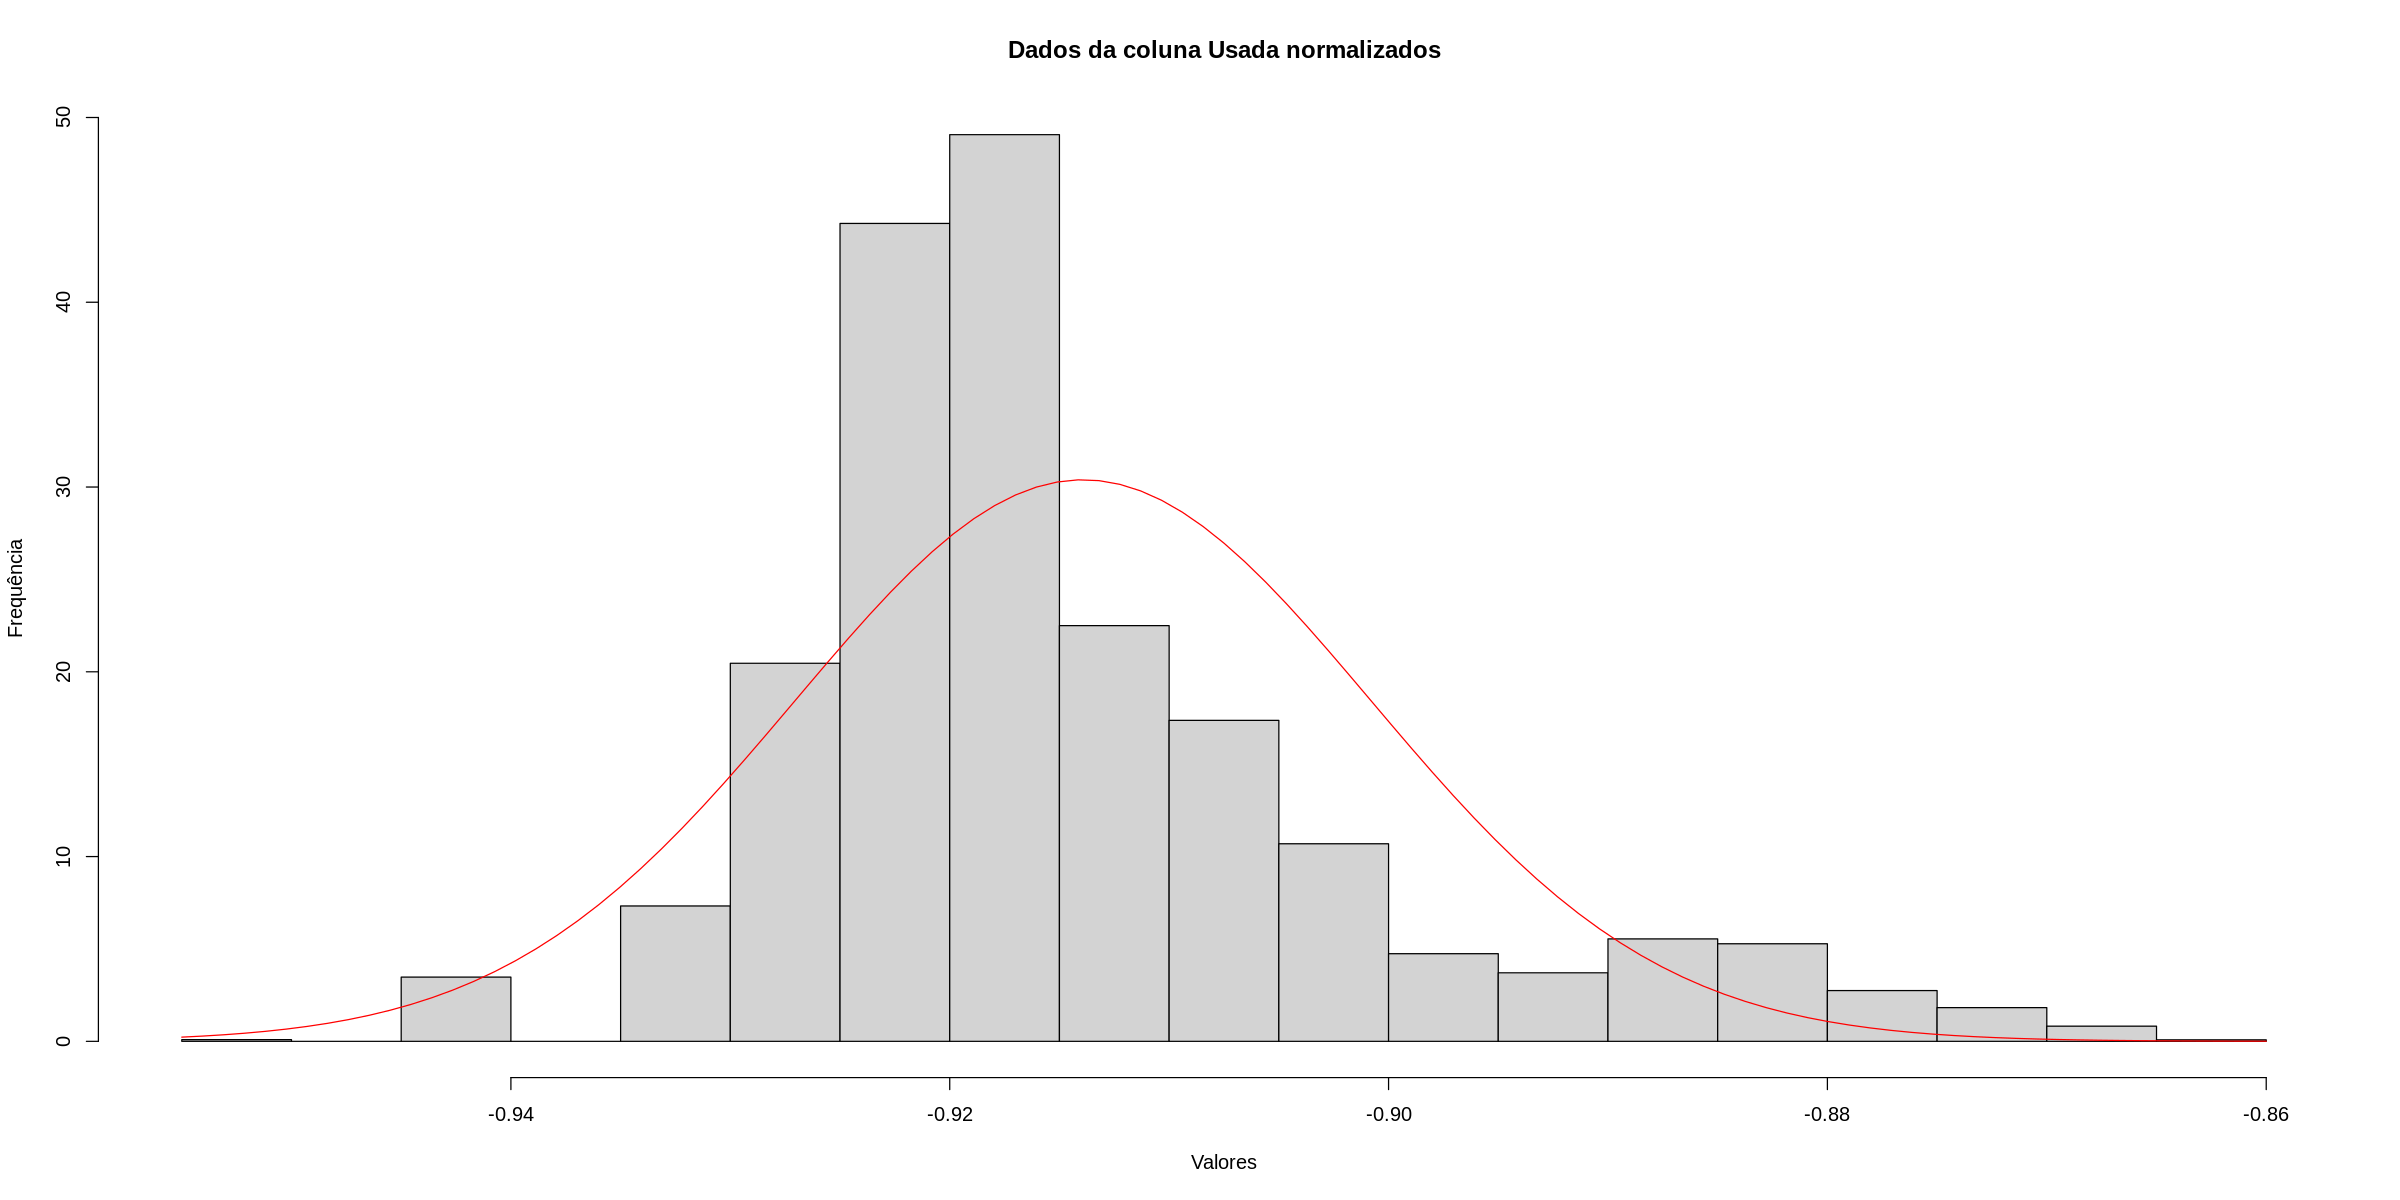

In [30]:
#Criando o quartil 1
quartil_1 = quantile(dados$Usada, 0.25)
#Criando o quartil 3
quartil_3 = quantile(dados$Usada, 0.75)
#Criando o intervalo InterQuartil
iqr = (quartil_3 - quartil_1)

#Criando os dados logaritmos de usada
usada_log = log(dados$Usada)

#Normalizando os dados com log e IQR
usada_normalizada = (usada_log - quartil_1) / iqr

#Plotando um gráfico de histograma com curva de densidade
hist(usada_normalizada, probability=T, main="Dados da coluna Usada normalizados", xlab="Valores", ylab="Frequência")
curve(dnorm(x, mean=mean(usada_normalizada), sd = sd(usada_normalizada)), col="red", add=T)

#Fazendo o teste de Kolmogorov
ks.test(usada_normalizada, "pnorm", mean(usada_normalizada), sd=sd(usada_normalizada))

Como os dados se mostraram negativos, estou aplicando a transformação para valores positivos, na tentativa de normalizar e padronizar os dados.

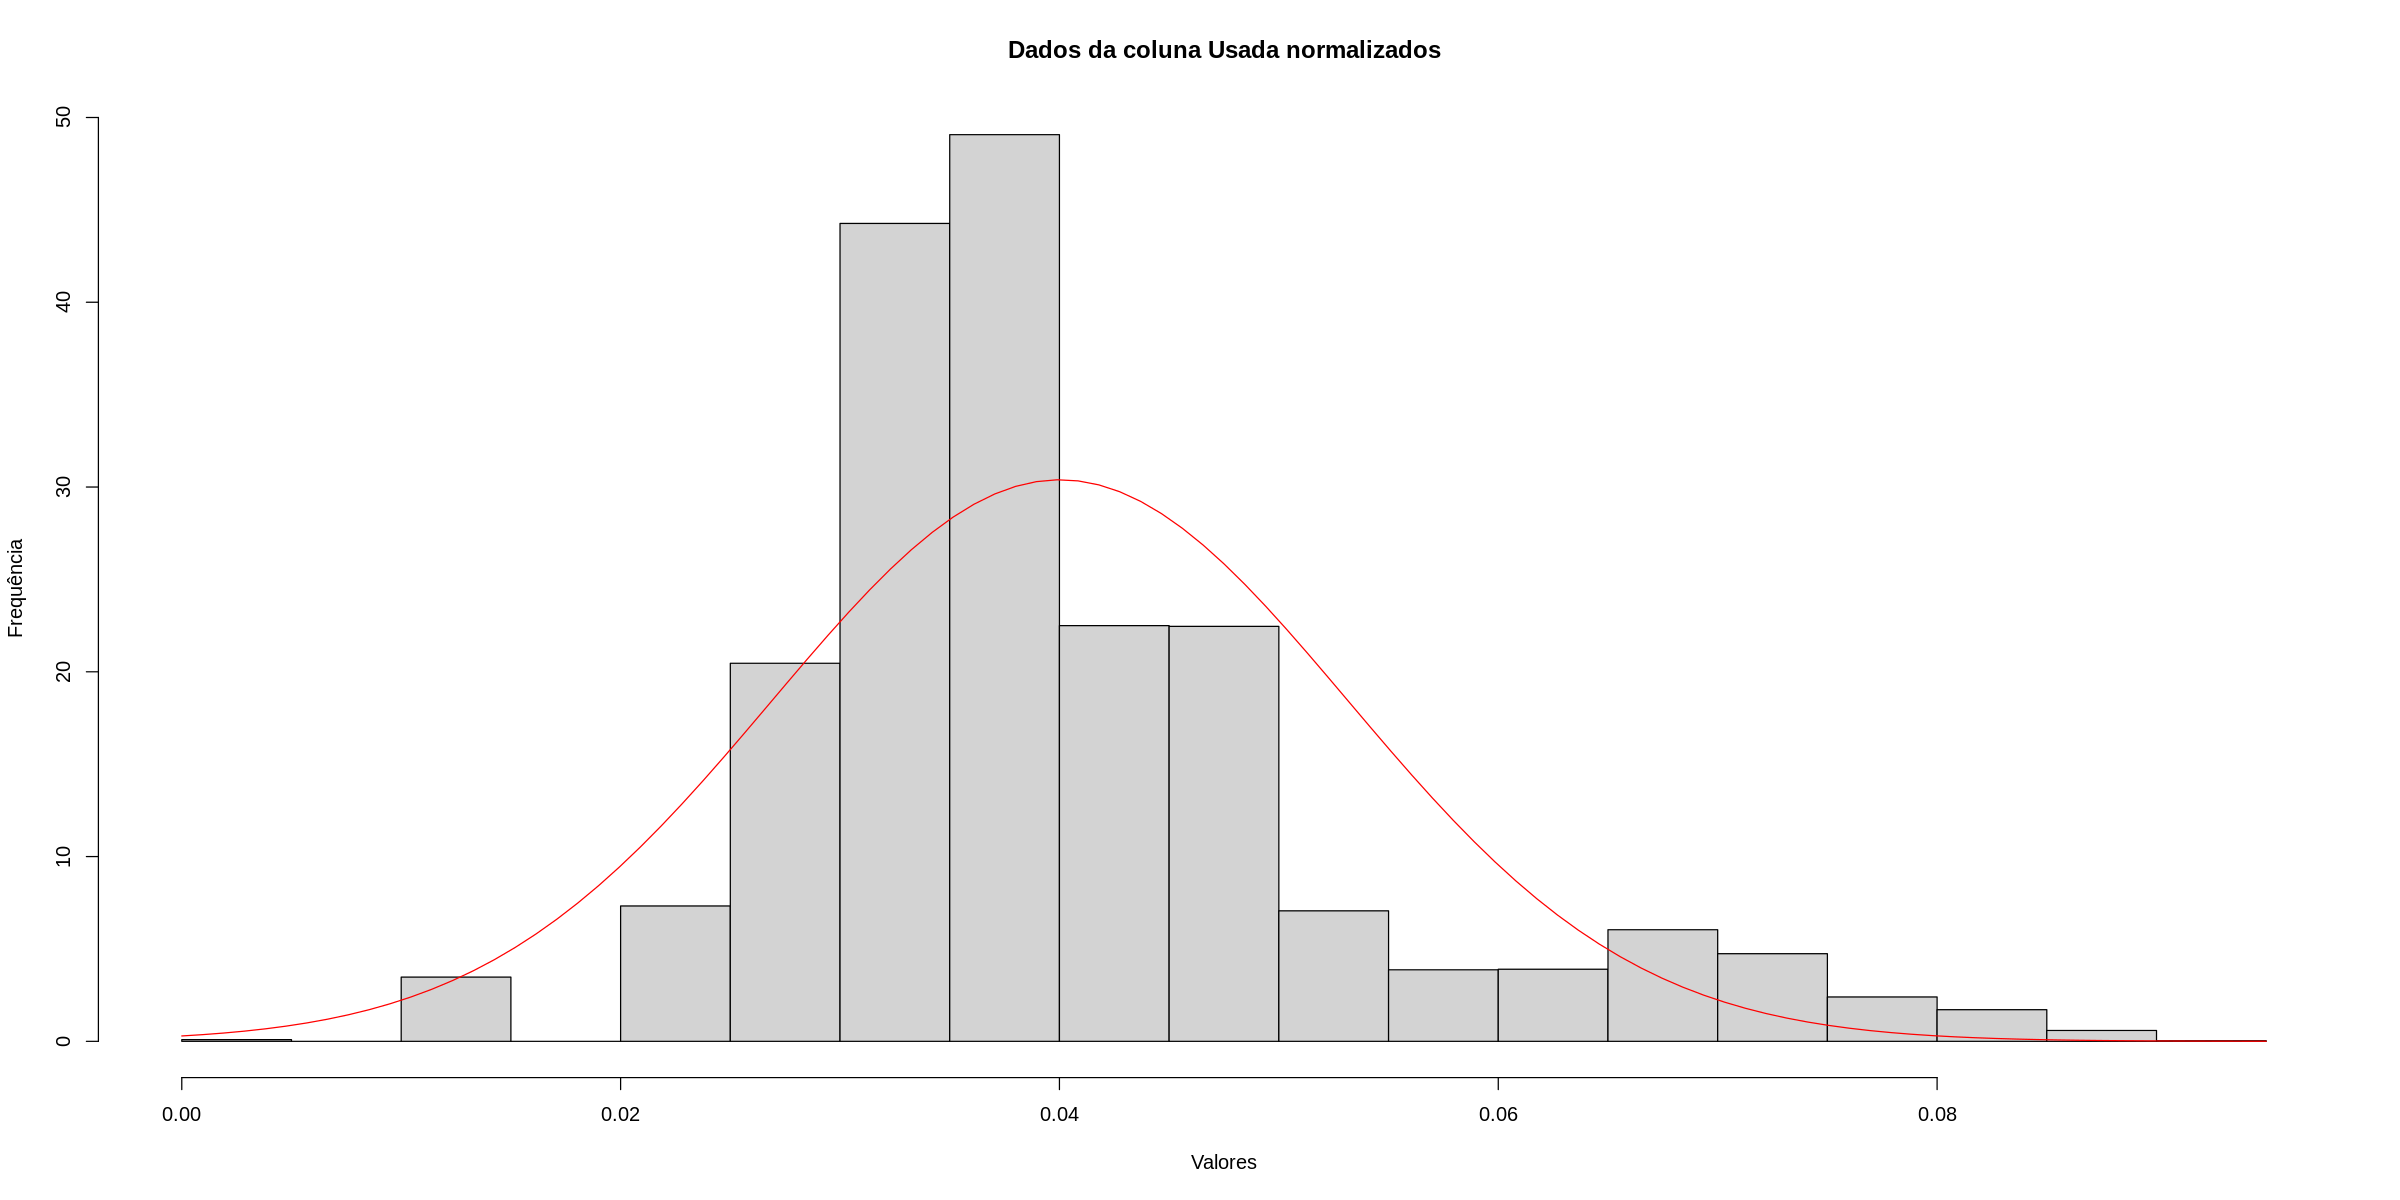

In [34]:
#Deslocamento para tornar os valores positivos
menor_valor = abs(min(usada_normalizada))
usada_ajustada = usada_normalizada + menor_valor

#Plotando um gráfico de histograma com curva de densidade
hist(usada_ajustada, probability=T, main="Dados da coluna Usada normalizados", xlab="Valores", ylab="Frequência")
curve(dnorm(x, mean=mean(usada_ajustada), sd = sd(usada_ajustada)), col="red", add=T)

Após análise, descartei novas tentativas de normalização dos dados levando em conta que podem ser distorcidos os dados e com isso, seria necessário refazer tudo novamente.
Irei aplicar a padronização com Z-Score e definir o último teste de komogorov para análise dos dados.

[1] -2.37845e-16

[1] 1

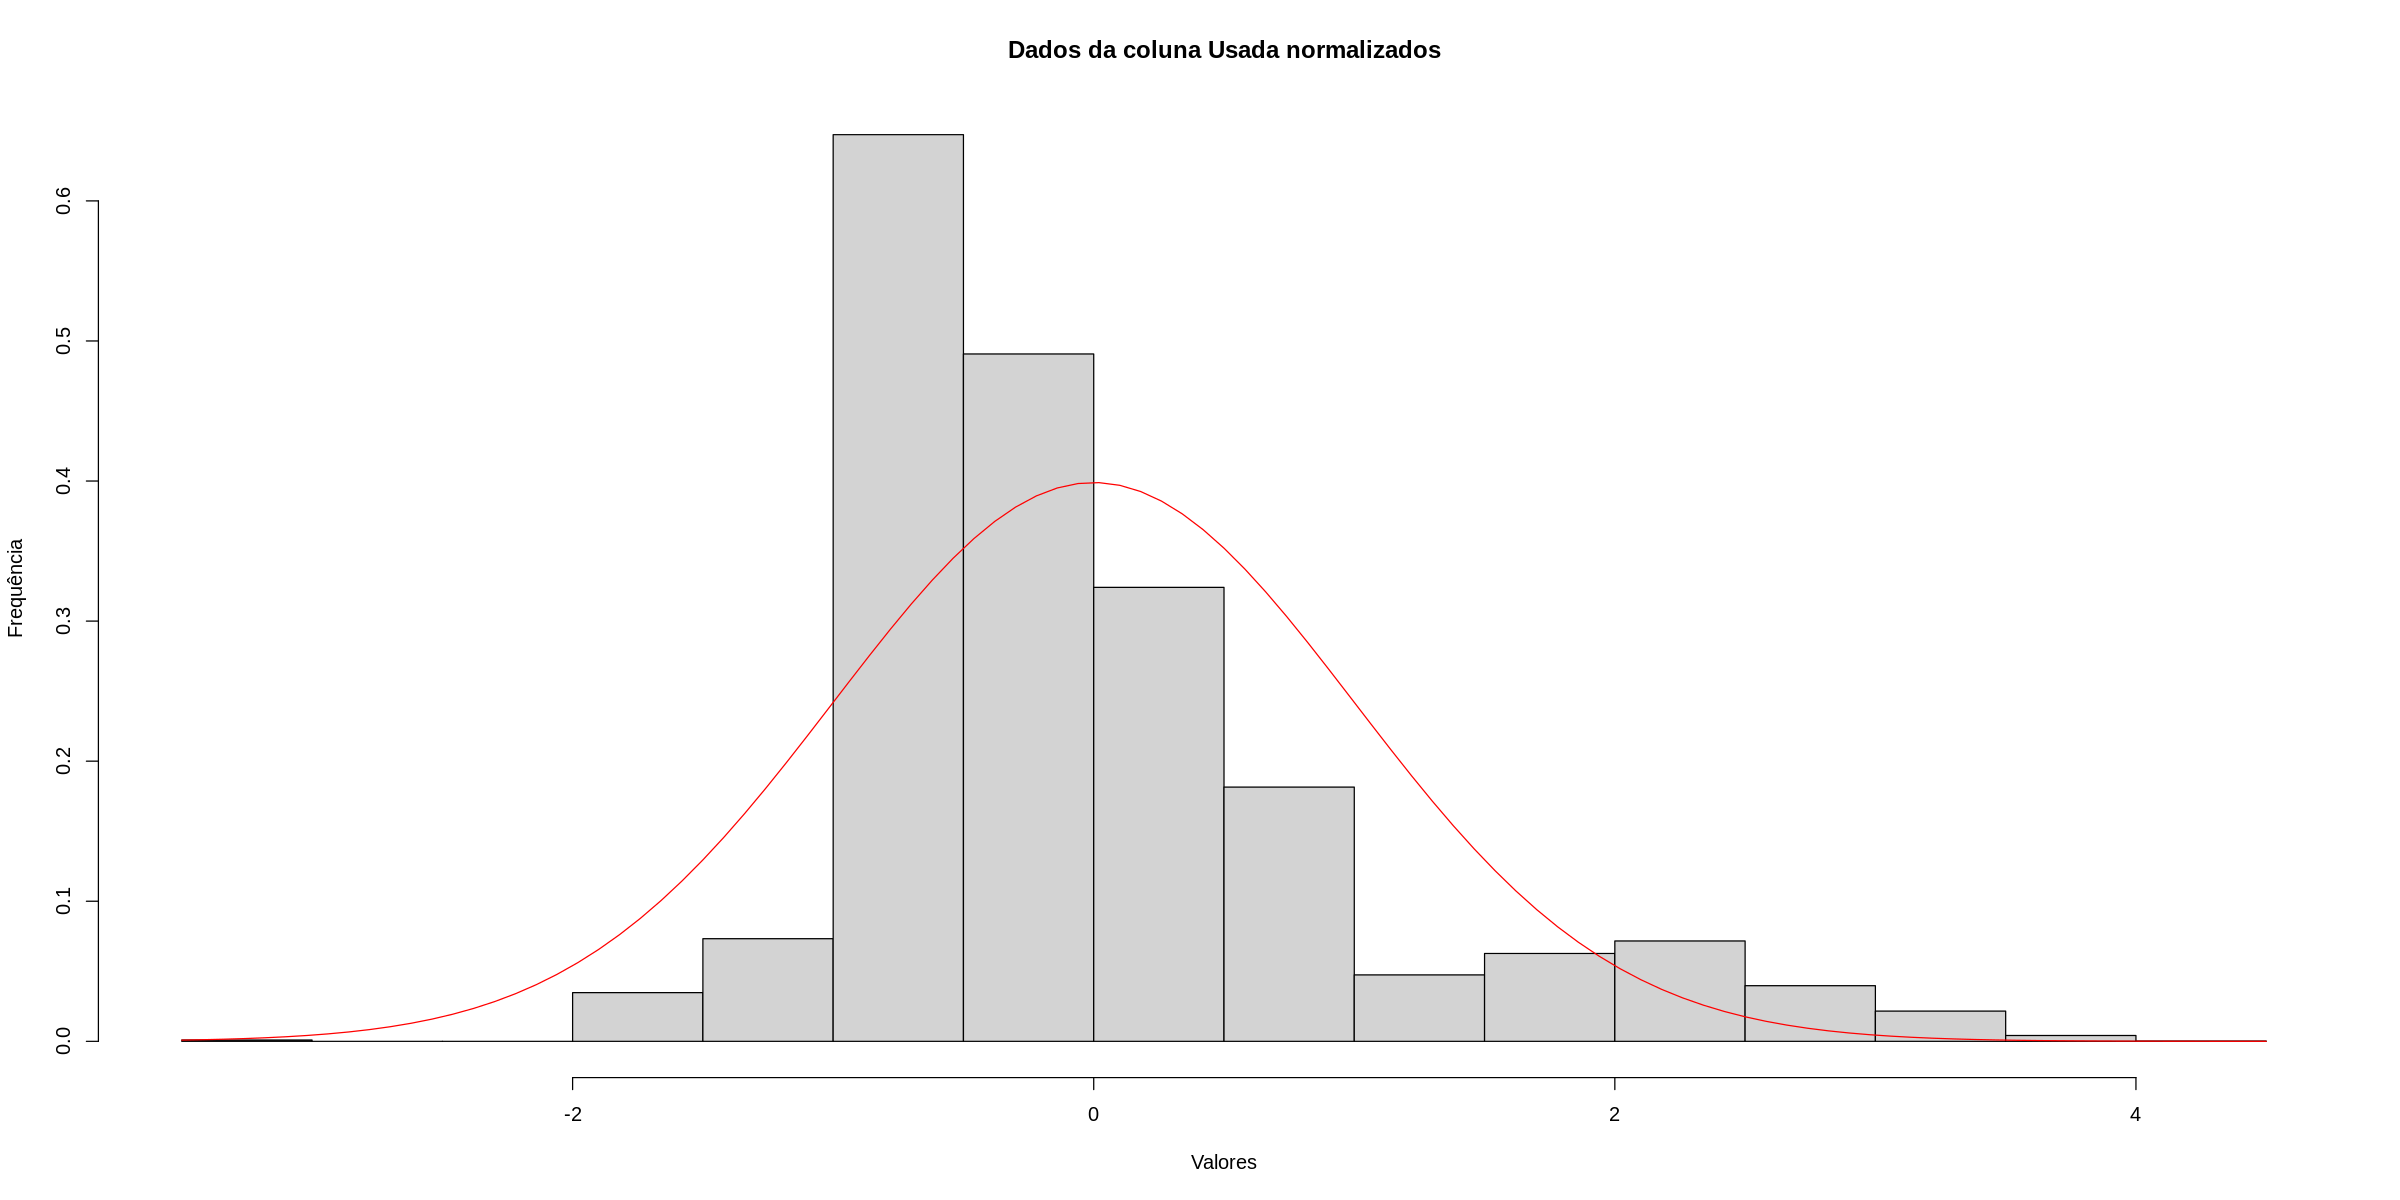

In [39]:
#Aplicando a função de padronização Z-Score
usada_zscore = scale(usada_ajustada)

#Visualizando os dados para se ter uma ideia de como ficaram
#usada_zscore

#Verificando a média e o desvio padrão da variável usada_zscore
mean(usada_zscore)
sd(usada_zscore)

#Plotando um gráfico de histograma com curva de densidade
hist(usada_zscore, probability=T, main="Dados da coluna Usada normalizados", xlab="Valores", ylab="Frequência")
curve(dnorm(x, mean=mean(usada_zscore), sd = sd(usada_zscore)), col="red", add=T)

Último ajuste dos dados, decidi remover os valores de outliers maiores que -3 e maiores que 3, devido a distorções que podem causar no modelo de machine learning, levando a hiperajuste ou subajuste.
Picos de outliers constantes em um modelo de Machine Learning podem distorcer a variabilidade real dos dados em cenários comuns e prejudicar valores de previsões reais.
Esse definitivamente seria o último ajuste para a coluna Usada e posso prosseguir para as demais colunas, seguindo os mesmos padrões de ajustes

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-1.99293 -0.59680 -0.31900 -0.04185  0.45933  2.97136 

[1] "\nConclusão da Padronização\nOs dados estão concentrados de forma consistente, e a dispersão é moderada (sem picos extremos).\nIsso é ideal para algoritmos de machine learning que se beneficiam de dados padronizados, como regressão linear, SVM, redes neurais e KNN.\n\nDistribuição dos Dados\n1.Histograma e Curva Normal:\nOs dados estão aproximadamente centrados em torno de zero, com a maior parte dentro de um intervalo esperado e uma leve assimetria.\nA sobreposição da curva normal demonstra que os dados estão razoavelmente próximos de uma distribuição normal, embora não perfeitamente alinhados, \no que é aceitável para muitas aplicações no mundo real.\n\n2.Resumo Estatístico:\nMédia: Muito próxima de zero (-0.04105), o que confirma a eficácia do z-score.\nAmplitude dos Dados: Com valores mínimos em torno de -1.9923 e máximos de 2.97136, os dados não apresentam outliers extremos, \njá que estão dentro do intervalo esperado para um bom z-score padronizado.\n"

[1] 19470

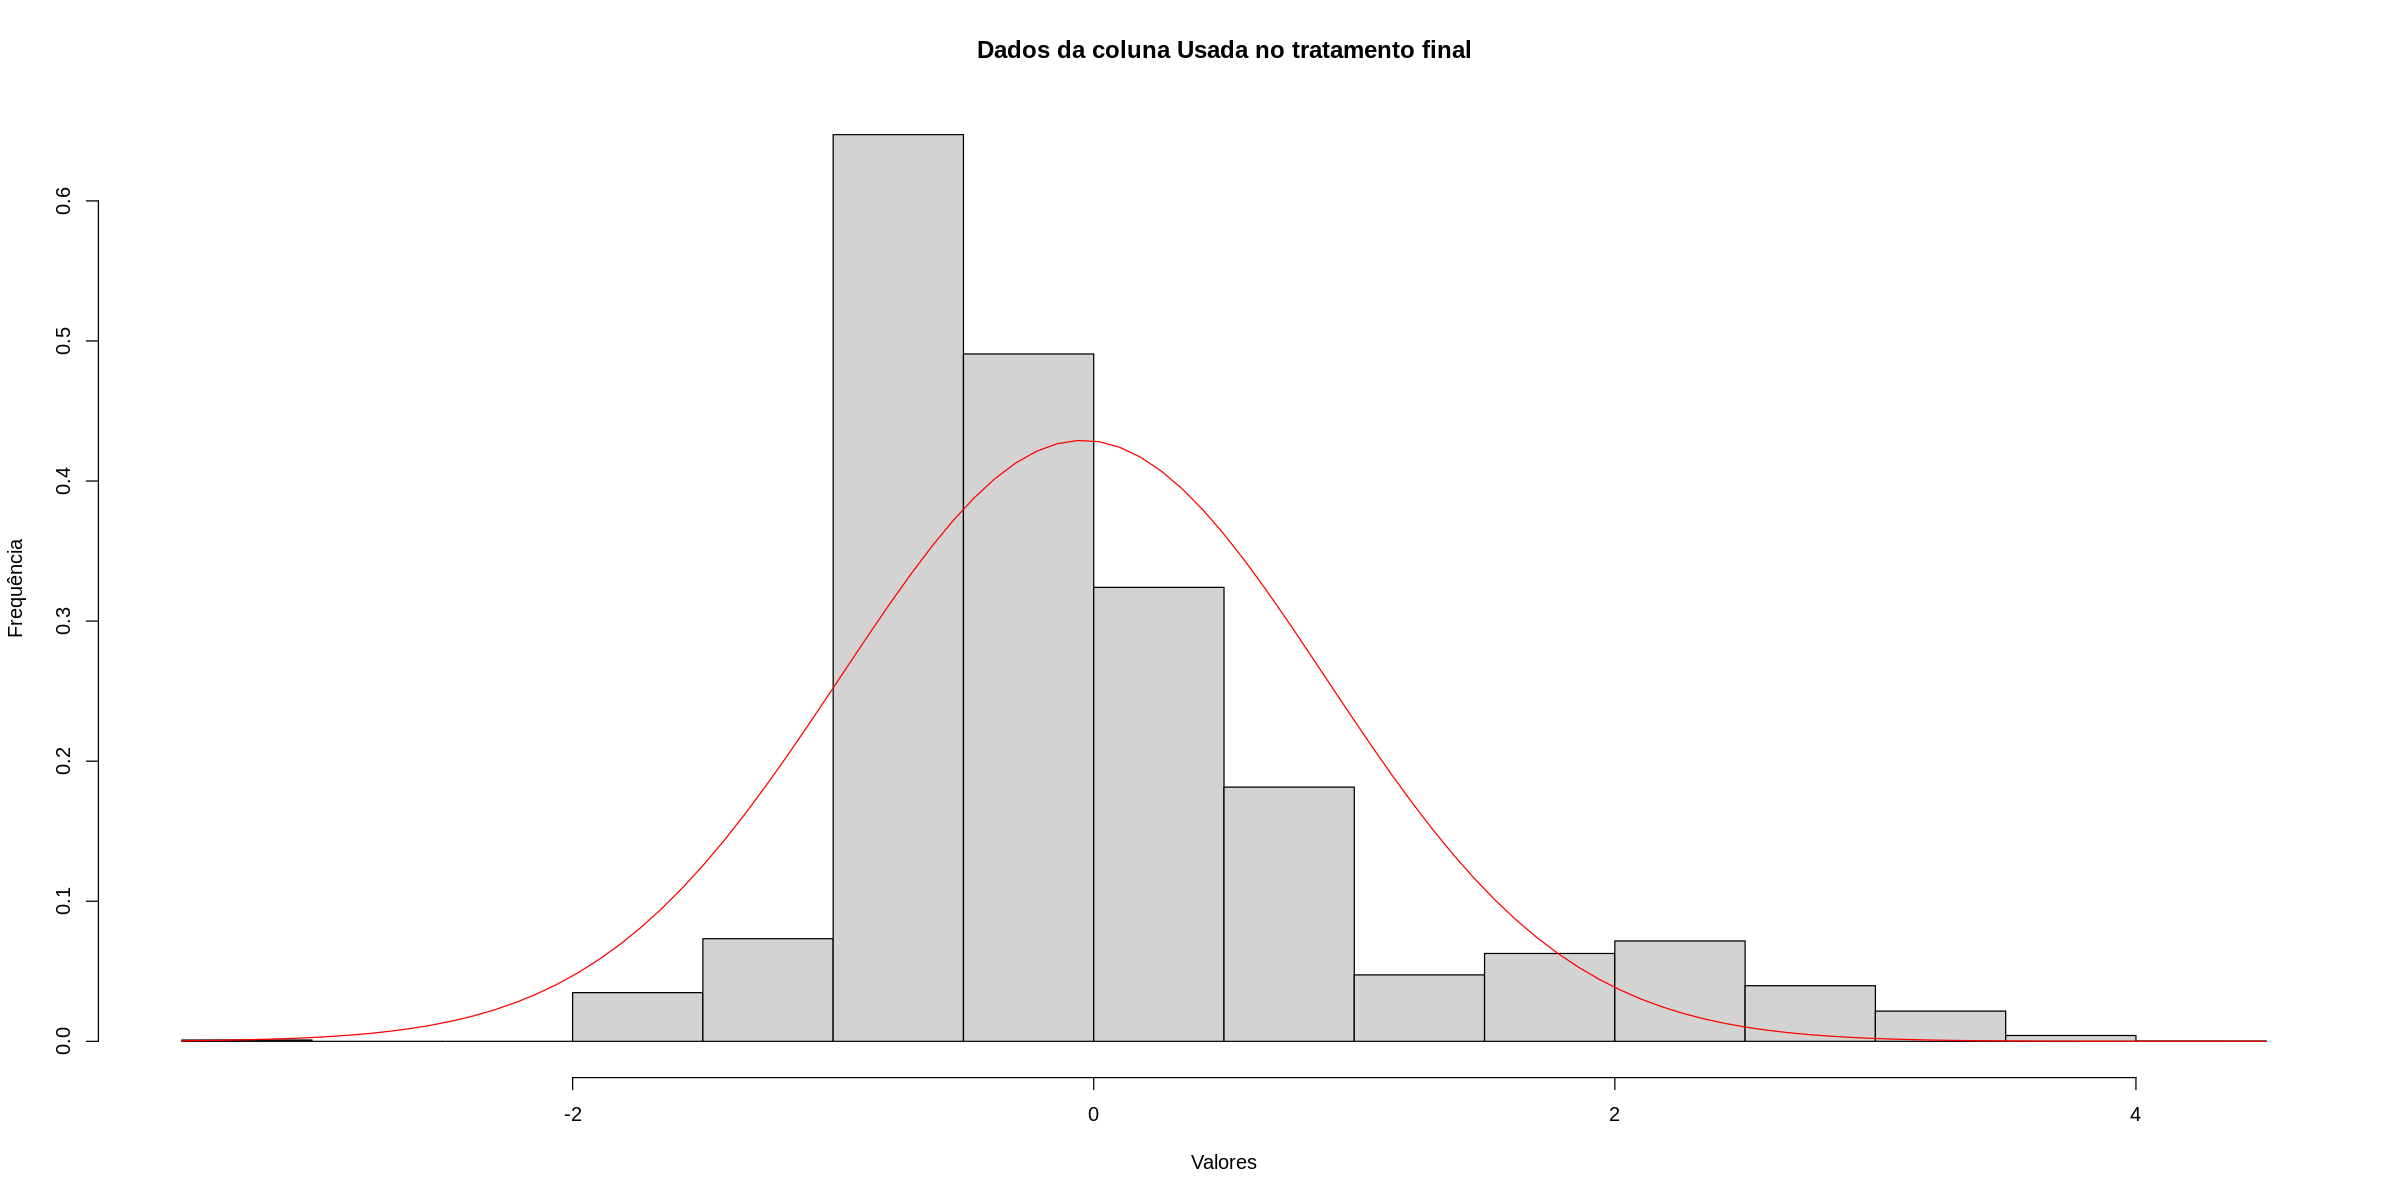

In [52]:
#Filtrando os dados maiores que -3 e maiores que 3 da variável usada_zscore
usada_final = usada_zscore[usada_zscore > -3 & usada_zscore < 3]

#Verificando o summary da variável usada_final
summary(usada_final)

#Plotando um gráfico de histograma com curva de densidade
hist(usada_zscore, probability=T, main="Dados da coluna Usada no tratamento final", xlab="Valores", ylab="Frequência")
curve(dnorm(x, mean=mean(usada_final), sd=sd(usada_final)), col="red", add=T)

"
Conclusão da Padronização
Os dados estão concentrados de forma consistente, e a dispersão é moderada (sem picos extremos).
Isso é ideal para algoritmos de machine learning que se beneficiam de dados padronizados, como regressão linear, SVM, redes neurais e KNN.

Distribuição dos Dados
1.Histograma e Curva Normal:
Os dados estão aproximadamente centrados em torno de zero, com a maior parte dentro de um intervalo esperado e uma leve assimetria.
A sobreposição da curva normal demonstra que os dados estão razoavelmente próximos de uma distribuição normal, embora não perfeitamente alinhados,
o que é aceitável para muitas aplicações no mundo real.

2.Resumo Estatístico:
Média: Muito próxima de zero (-0.04105), o que confirma a eficácia do z-score.
Amplitude dos Dados: Com valores mínimos em torno de -1.9923 e máximos de 2.97136, os dados não apresentam outliers extremos,
já que estão dentro do intervalo esperado para um bom z-score padronizado.
"

length(usada_final)
#19470

Criando um data frame que armazena os valores novos das colunas que irei espeficiar

In [ ]:
#Criação do data frame
df = data.frame(matrix(NA, nrow = 19470, ncol = 29))

#Adicionando nomes as colunas
colnames(df) = c("Data","Usada","Luzes","TempCoz","UmiCoz","TempSala","UmiSala","TempLava","UmiLava",
                    "TempEsc","UmiEsc","TempBan","UmiBan","TempImoLN","UmiImoLN","TempPasRou","UmiPasRou",
                    "TempQua1","UmiQua1","TempQua2","UmiQua2","TempExt","Pressao","UmiExt","VenVelo","Visibilidade",
                    "PontoOrvalho","Aleatoria1","Aleatoria2")

#Adicionando os dados da variável usada_final para a coluna Usada no data frame df
df$Usada = usada_final

Normalização e padronização da coluna Luzes do data frame original dados que será adicionado ao novo data frame normalizado e padronizado df

In [ ]:
summary(dados$Luzes)

#Criando a variável que armazena os valores log da coluna Luzes
luzes_log = log(dados$Luzes)

summary(luzes_log)

#Criando a variável do desvio padrão que remove os picos de outliers
desvio_luzes_log = sd(luzes_log)
#Criando a variável da média que remove os picos de outliers
media_luzes_log = mean(luzes_log)
#Criando a variável da mediana que remove os valores faltantes
mediana_luzes_log = median(luzes_log, na.rm=T)

#Substituindo os valores de outliers pelo desvio padrão
limite_inferior = media_luzes_log - 2 * desvio_luzes_log
limite_superior = media_luzes_log + 2 * desvio_luzes_log

#Filtrando os dados para remover outliers
luzes_sem_outliers = luzes_log[luzes_log >= limite_inferior & luzes_log <= limite_superior]

summary(luzes_sem_outliers)
length(luzes_sem_outliers)

Adicionando luzes_log ao novo data frame df na coluna Luzes

In [170]:
# Preenchendo os valores restantes com NA para que as dimensões batam
luzes_completas = rep(NA, nrow(df))
luzes_completas[1:length(luzes_sem_outliers)] = luzes_sem_outliers

# Substituindo os valores faltantes (NA) pela mediana
mediana_luzes_log = median(luzes_sem_outliers, na.rm = TRUE)
luzes_completas[is.na(luzes_completas)] = mediana_luzes_log

# Atribuindo ao data frame
df$Luzes = luzes_completas

Data,Usada,Luzes,TempCoz,UmiCoz,TempSala,UmiSala,TempLava,UmiLava,TempEsc,⋯,TempQua2,UmiQua2,TempExt,Pressao,UmiExt,VenVelo,Visibilidade,PontoOrvalho,Aleatoria1,Aleatoria2
<lgl>,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,⋯,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
NA,-0.31900143,3.401197,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,-0.31900143,3.401197,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,-0.59680071,3.401197,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,-0.59680071,3.401197,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,-0.31900143,3.401197,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,-0.59680071,2.995732,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,-0.31900143,3.401197,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,-0.31900143,2.995732,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,-0.31900143,3.401197,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
